<a href="https://colab.research.google.com/github/Haizhepi/MLCheatSheet/blob/master/RNN_on_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
x = np.linspace(0, 50, 501)

In [89]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [90]:
y = np.sin(x)

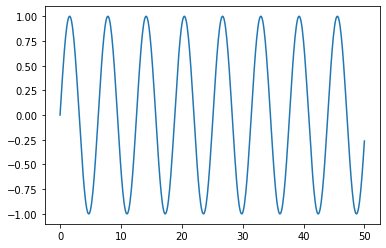

In [91]:
plt.plot(x, y)

In [92]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [93]:
len(df)

501

In [94]:
test_percent = 0.1

In [95]:
len(df) * test_percent

50.1

In [96]:
test_point = np.round(len(df) * test_percent)

In [97]:
test_point

50.0

In [98]:
test_ind = int(len(df) - test_point)

In [99]:
train = df.iloc[:test_ind]

In [100]:
test = df.iloc[test_ind:]

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [104]:
scaled_train = scaler.transform(train)

In [105]:
scaled_test = scaler.transform(test)

In [106]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [107]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [108]:
from tensorflow.keras.models import Sequential

In [109]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [110]:
n_features = 1

In [111]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0109
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 4.0850e-05
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 2.2289e-06
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0012
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 3.9204e-05


In [114]:
losses = pd.DataFrame(model.history.history)

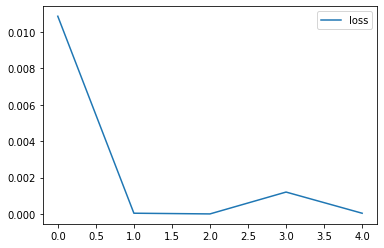

In [115]:
losses.plot()

In [116]:
first_eval_batch = scaled_train[-length:]

In [117]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [118]:
model.predict(first_eval_batch)

array([[0.94678265]], dtype=float32)

In [119]:
scaled_test[0]

array([0.94955134])

In [120]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)


In [121]:
true_predictions = scaler.inverse_transform(test_predictions)

In [122]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


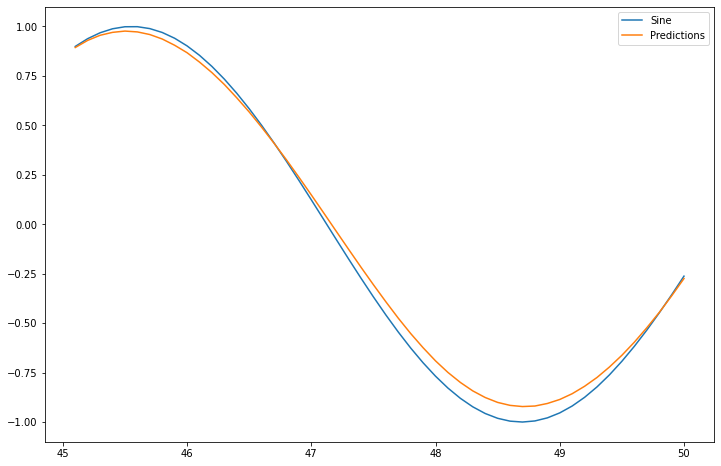

In [123]:
test.plot(figsize=(12, 8))

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [126]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [127]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [128]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 19ms/step - loss: 0.0235 - val_loss: 3.2906e-05
Epoch 2/20
402/402 [==============================] - 8s 19ms/step - loss: 1.0412e-04 - val_loss: 9.2840e-06
Epoch 3/20
402/402 [==============================] - 7s 19ms/step - loss: 1.1744e-04 - val_loss: 4.1610e-06
Epoch 4/20
402/402 [==============================] - 7s 18ms/step - loss: 1.6490e-04 - val_loss: 1.9118e-05
Epoch 5/20
402/402 [==============================] - 7s 18ms/step - loss: 2.9830e-04 - val_loss: 2.7738e-05


In [129]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


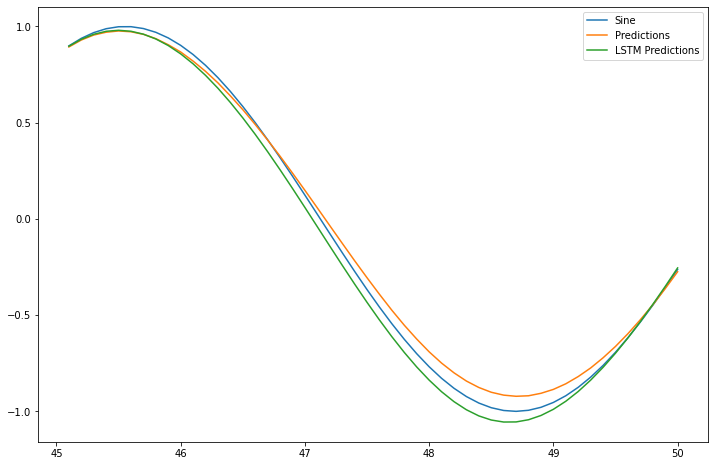

In [130]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12, 8))

In [131]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [132]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=batch_size)

In [133]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [134]:
model.fit_generator(generator, epochs=6)

Epoch 1/6
452/452 [==============================] - 8s 18ms/step - loss: 0.0193
Epoch 2/6
452/452 [==============================] - 8s 18ms/step - loss: 6.3916e-04
Epoch 3/6
452/452 [==============================] - 8s 18ms/step - loss: 9.1282e-05
Epoch 4/6
452/452 [==============================] - 8s 18ms/step - loss: 1.5462e-04
Epoch 5/6
452/452 [==============================] - 8s 18ms/step - loss: 7.4567e-04
Epoch 6/6
452/452 [==============================] - 8s 18ms/step - loss: 2.0538e-05


In [135]:
forcast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):

  current_pred = model.predict(current_batch)[0]

  forcast.append(current_pred)
  
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [136]:
forcast = scaler.inverse_transform(forcast)

In [137]:
forcast_index = np.arange(50.1, 52.6, step=0.1)

In [138]:
len(forcast_index)

25

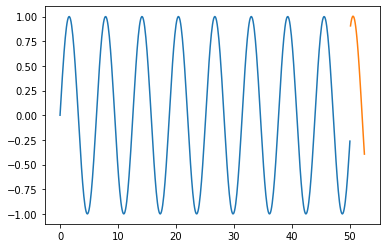

In [140]:
plt.plot(df.index, df['Sine'])
plt.plot(forcast_index, forcast)